## Data Science Business Analytics Internship
### GRIP @ The Sparks Foundaton
### BY: Jalaj Mehta
## TASK 5 - Exploratory Data Analysis on dataset 'Indian Premier League'
Performing Exploratory Data Analysis on the dataset "Sports". As sports analysts find the most successful teams, players, and factors contributing win or loss of a team.
## STEP 0 - Import the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the first dataset

In [2]:
# Loading the dataset
matches=pd.read_csv("/content/matches.csv")
print("Showing part of the whole dataset:")
matches.head(10)

Showing part of the whole dataset:


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


### Load the second dataset:

In [3]:
# Loading the dataset
deliveries=pd.read_csv("/content/deliveries.csv")
print("Showing part of the whole dataset:")
deliveries.head(10)


Showing part of the whole dataset:


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6.0,S Dhawan,DA Warner,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7.0,S Dhawan,DA Warner,TS Mills,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1.0,S Dhawan,DA Warner,A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2.0,DA Warner,S Dhawan,A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3.0,DA Warner,S Dhawan,A Choudhary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


## STEP 1 - Common Dataset Exploration

### THE FIRST DATASET

In [4]:
# Checking common information for the dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Output:


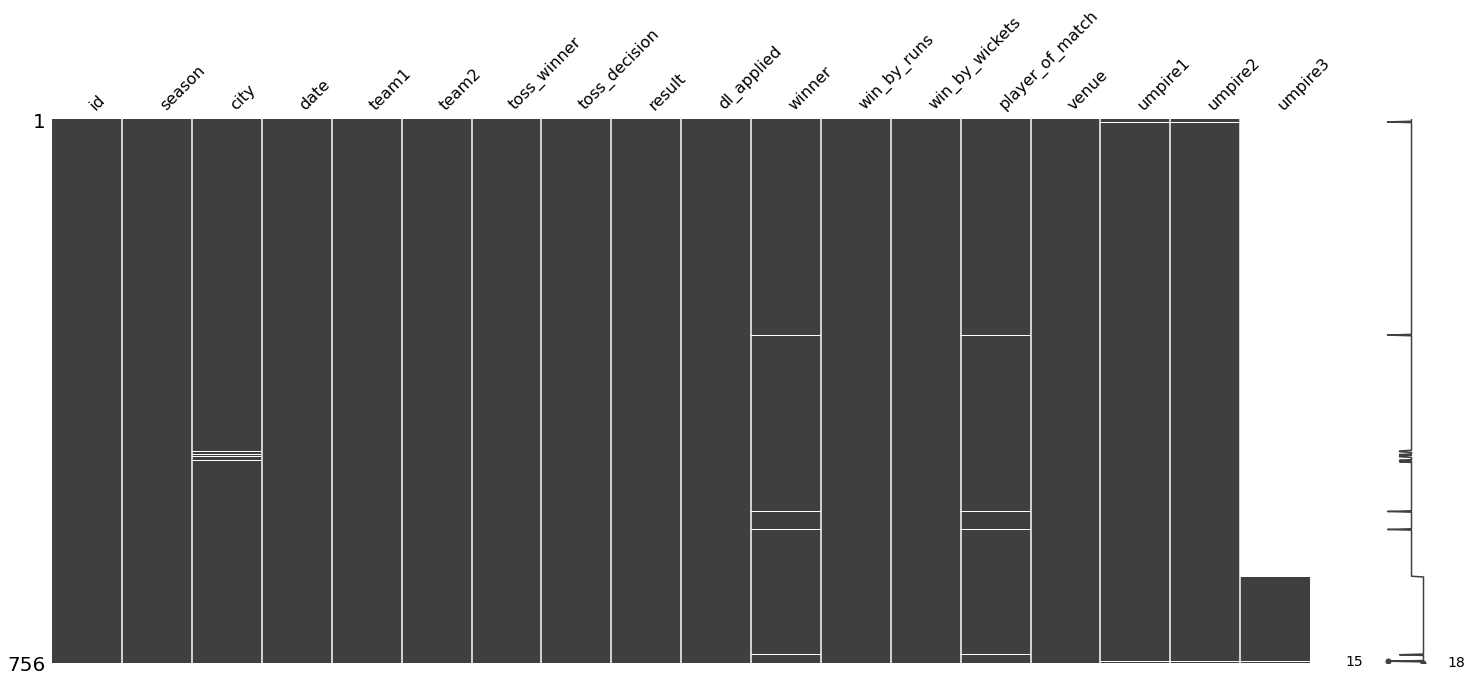

In [7]:
# Visualize missing value as a matrix
import missingno as msno
print("Output:")
msno.matrix(matches)

Output:


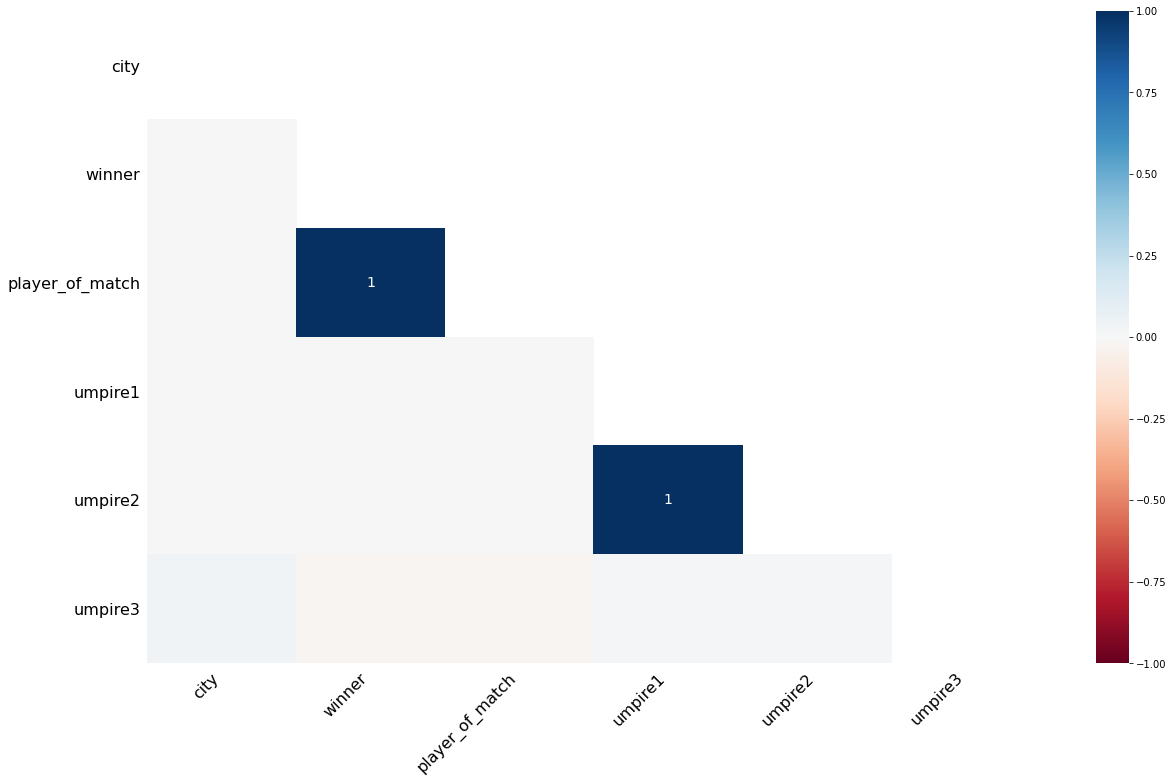

In [8]:
# Visualize the correlation between the number of missing values in diffrent columns as a heatmap
print("Output:")
msno.heatmap(matches)

In [9]:
# Percentage of missing values in each column 
missingper = matches.isnull().sum() * 100 / len(matches)

In [10]:
print(missingper)

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64


'umpire3' contains too much missing data and must be dropped:

In [11]:
matches=matches.drop('umpire3', axis=1)

### THE SECOND DATASET

In [12]:
# Checking common information for the dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82713 entries, 0 to 82712
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          82713 non-null  int64  
 1   inning            82713 non-null  int64  
 2   batting_team      82713 non-null  object 
 3   bowling_team      82713 non-null  object 
 4   over              82713 non-null  int64  
 5   ball              82712 non-null  float64
 6   batsman           82712 non-null  object 
 7   non_striker       82712 non-null  object 
 8   bowler            82712 non-null  object 
 9   is_super_over     82712 non-null  float64
 10  wide_runs         82712 non-null  float64
 11  bye_runs          82712 non-null  float64
 12  legbye_runs       82712 non-null  float64
 13  noball_runs       82712 non-null  float64
 14  penalty_runs      82712 non-null  float64
 15  batsman_runs      82712 non-null  float64
 16  extra_runs        82712 non-null  float6

In [13]:
deliveries.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    1
batsman                 1
non_striker             1
bowler                  1
is_super_over           1
wide_runs               1
bye_runs                1
legbye_runs             1
noball_runs             1
penalty_runs            1
batsman_runs            1
extra_runs              1
total_runs              1
player_dismissed    78577
dismissal_kind      78577
fielder             79735
dtype: int64

Take a look at the discrete variables using .unique():

In [14]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [17]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

There are two familiar statement; 'Rising Pune Supergiant', and 'Rising Pune Supergiants'

In [18]:
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [19]:
deliveries.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace = True)

In [20]:
matches.loc[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [21]:
matches['city'].fillna('Dubai', inplace = True)

In [22]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

There are two familiar statement; 'Bengaluru' and 'Bengalore'

In [23]:
matches.replace('Bengaluru','Bangalore', inplace = True)

In [24]:
deliveries.replace('Bengaluru','Bangalore', inplace = True)

## STEP 2 - Early Expectation
### Amount of matches:

In [25]:
# Number of matches
matches['id'].max()

11415

### Amount of seasons:

In [26]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [27]:
# Number of seasons
len(matches['season'].unique())

12

### Team won by maximum runs:

In [28]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

### Team won by minimum runs:

In [29]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Team won by maximum wickets:

In [30]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## STEP 3 - Visualization

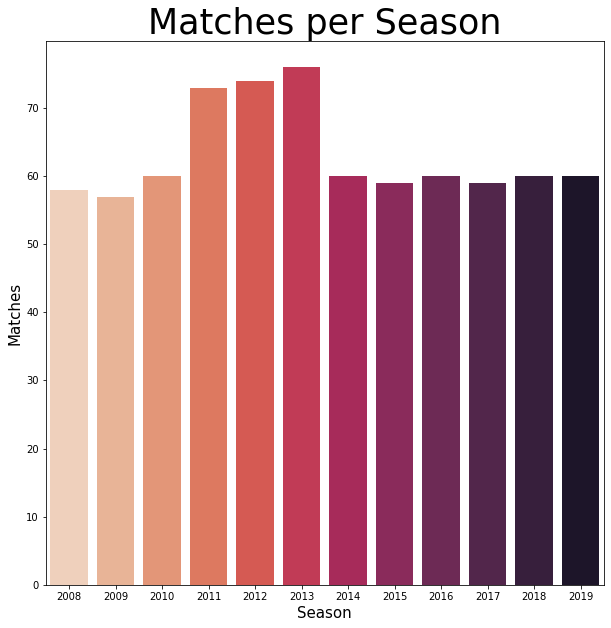

In [31]:
# Matches per season
plt.subplots(figsize=(10,10))

sns.countplot(x = 'season', data = matches, palette = 'rocket_r')

plt.title('Matches per Season',fontsize=35)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Matches',fontsize=15)

plt.show()

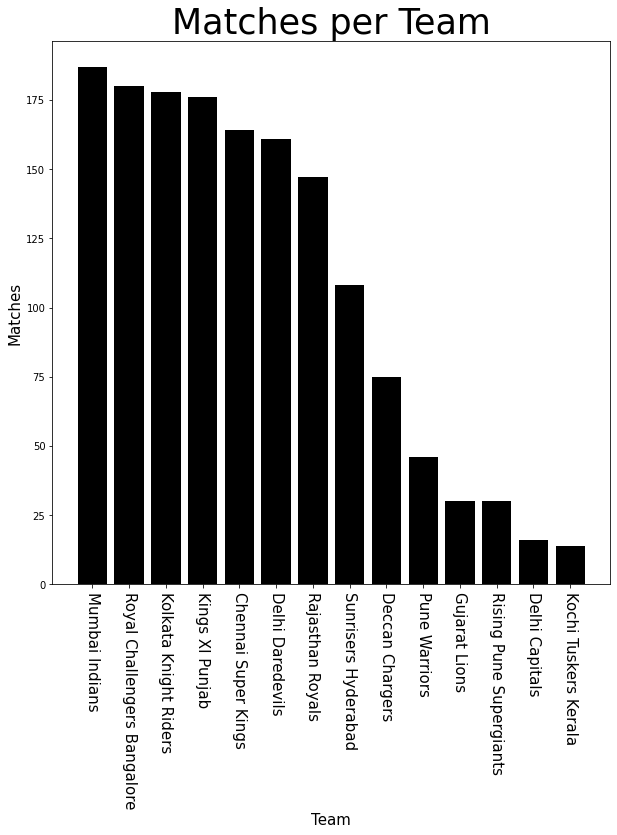

In [32]:
# Matches per team
num_matches = pd.concat([matches['team1'], matches['team2']])
num_matches = num_matches.value_counts()

plt.figure(figsize=(10,10))

plt.bar(x=num_matches.index, height=num_matches.values,color='black')

plt.title('Matches per Team',fontsize=35)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=270,fontsize=15)
    
plt.show()

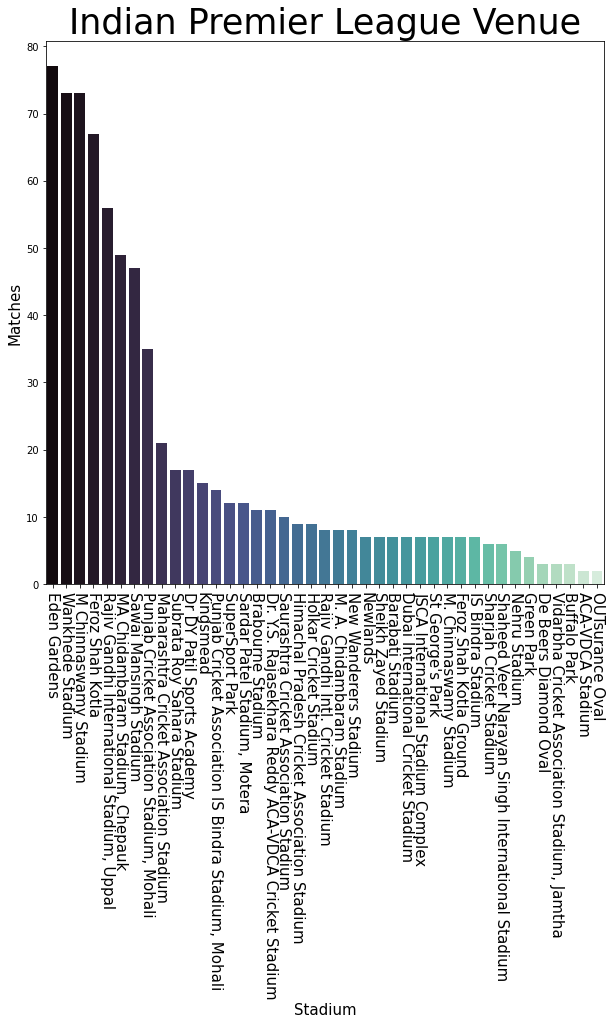

In [33]:
# Visualization of how many matches were played in which venue.
plt.subplots(figsize=(10,10))

sns.countplot(x ='venue',data=matches,palette='mako',order=matches['venue'].value_counts().index)

plt.title('Indian Premier League Venue',fontsize=35)
plt.xlabel('Stadium',fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=270,fontsize=15)

plt.show()

In [34]:
seasonw = matches.drop_duplicates('season', keep='last')
seasonw = seasonw[['season', 'winner']]
seasonw.sort_values('season',inplace=True)
seasonw.reset_index(inplace=True, drop=True)

In [35]:
print(seasonw)

    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


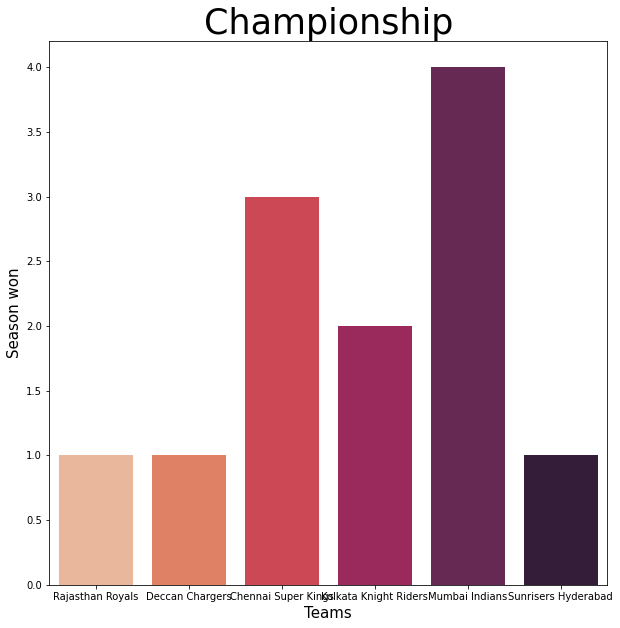

In [37]:
# Championships per Team
plt.subplots(figsize=(10,10))

sns.countplot('winner', data = seasonw, palette = 'rocket_r')

plt.title('Championship',fontsize=35)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Season won',fontsize=15)

plt.show()

In [41]:
top_players = matches.player_of_match.value_counts()[:10]

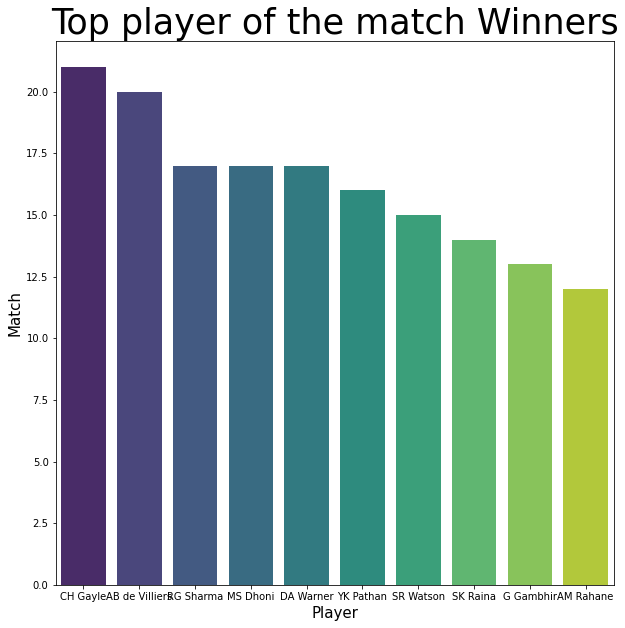

In [42]:
# Top 10 players
plt.figure(figsize=(10,10))

sns.barplot(x=top_players.index,y=top_players, palette="viridis")

plt.title('Top player of the match Winners',fontsize=35)
plt.xlabel('Player',fontsize=15)
plt.ylabel('Match',fontsize=15)

plt.show()

### STEP 4 - Conclusion
- 2013 has the most matches followed by 2012 and 2011
- 2009 is the season with the least matches
- Mumbai Indians plays the highest amount of matches and has won more seasons than the other teams
- Chennai Super Kings ranked the second highest in winning matches followed by Kolkata Knight Riders
- Eden Gardens hosts the highest number of matches followed by M Chinnaswamy Stadium and Wankhede Stadium
- CH Gayle won the most MVP awards in Indian Premier League